In [1]:
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np

### The Binomial Distribution

The binomial distribution applies when I have a process that has only two outcomes. Suppose some baseball team has a 70% chance of winning any game that it plays. The binomial distribution can tell me what the probability is that the team win exactly $k$ out of $n$ games ($k < n$).

$\Large f(x) = {n \choose k}p^k(1 - p)^{n - k}$

Note: ${n\choose k} = \frac{n!}{k!(n - k)!}$, the number of ways of choosing $k$ objects from a total of $n$.

The probability of getting r number of positive outcomes given n number of scenarios:

$$\large P(X = r) = \frac{n \choose r}{2^n} $$

For the coin toss example, we have 5 flips and set $X = \text{# of heads in 5 flips}$.
What is the probability of getting no heads? In this case, $X = 0$ and thus $r=0$:

$$ \frac{n \choose r}{2^n} = \frac{5 \choose 0}{2^5} $$

$$\hspace{32pt} = \frac{\frac{5!}{(5-0)!0!}}{36}$$

$$\hspace{16pt}= \frac{1}{36} $$

We can use the scipy.stats module to make quick statistical calculations!

In [3]:
stats.binom

In [4]:
# Suppose I flip a fair coin 300 times. What are the chances that I get exactly 162 heads?

stats.binom.pmf(162, 300, 0.5)

0.01766200732547356

In [5]:
# What is the standard deviation of a binomial distribution of 10 repeated trials,
# where each trial has a probability of success of 45%?

stats.binom.std(10, 0.45)

1.5732132722552274

In [6]:
# For a binomial variable representing 500 repeated trials,
# where each has a probability of success of 90%,
# what interval will contain 50% of my distribution?

stats.binom.interval(0.5, 500, 0.9)

(446.0, 455.0)

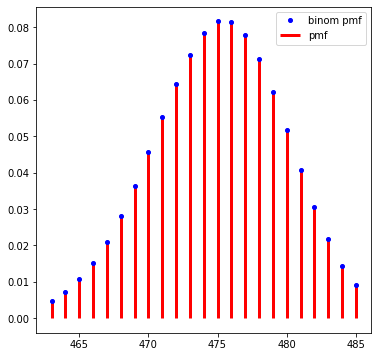

In [12]:
n = 500
p = 0.95
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
x = np.arange(stats.binom.ppf(0.01, n, p),
              stats.binom.ppf(0.99, n, p))

ax.plot(x, stats.binom.pmf(x, n, p), 'bo', ms=4, label='binom pmf')
ax.vlines(x, 0, stats.binom.pmf(x, n, p), 'r', linewidth=3,
          label='pmf')
ax.legend(loc='best')
plt.show()

# Type I and Type II Errors

<img src="type1_2_error.jpg">

#### Question 1

A nationwide poll showed an unemployment rate of 9% in the US. The Mayor of a local town wonders if this national result holds true for her town, so she plans on taking a sample of her residents to see if the unemployment rate is significantly different than 9% in her town.

Let p represent the unemployment rate in her town. Here are the hypotheses she’ll use:

H0: p = 0.09
H1: p != 0.09

Under which of the following conditions would the mayor commit a Type I Error?

- She concludes the town’s unemployment rate is not 9% when it actually is. Type 1
- She concludes the town’s unemployment rate is not 9% when it actually is not. Correct
- She concludes the town’s unemployment rate is 9% when it actually is. Correct
- She concludes the town’s unemployment rate is 9% when it actually is not. Type 2


#### Question 2

A school is considering building another cafeteria. They plan to survey a sample of their students to see if the proportion interested in a meal plan is higher than 40%, in which case they will consider building a new cafeteria. 

Let p represent the proportion of students interested in a meal plan.  Here are the hypotheses they’ll use:

$$H_0: p \leq 0.40$$
$$H_1: p > 0.40$$

What would be the consequence of a Type II error (failing to reject H0, even though it is false) in this context?

- They don’t consider building the new cafeteria when they should. x
- They don’t consider building the new cafeteria when they shouldn’t. Correct
- They consider building a new cafeteria when they shouldn’t. Type 1
- They consider building a new cafeteria when they should. Correct